# **Importing Required Libraries and Dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.feature_selection import mutual_info_classif

from catboost import CatBoostClassifier


In [2]:
train_data = pd.read_csv('/kaggle/input/playground-series-s4e2/train.csv')
test_data = pd.read_csv('/kaggle/input/playground-series-s4e2/test.csv')

In [3]:
# basic information aboout the data
print("# Train Data INFO\n")
print(train_data.info())

print("\n# Test Data INFO\n")
print(test_data.info())

# Train Data INFO

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC          

# **Data Description**

In [4]:
train_data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
train_data.shape

(20758, 18)

In [6]:
train_data.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [7]:
test_data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [8]:
test_data.shape

(13840, 17)

In [9]:
test_data.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000
mean,27677.500000,23.952740,1.698934,87.384504,2.442898,2.750610,2.032044,0.974532,0.611033
std,3995.408198,5.799814,0.088761,26.111819,0.531606,0.710927,0.611230,0.840361,0.608005
min,20758.000000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,24217.750000,20.000000,1.631662,65.000000,2.000000,3.000000,1.771781,0.001086,0.000000
50%,27677.500000,22.906342,1.700000,83.952968,2.358087,3.000000,2.000000,1.000000,0.552498
75%,31137.250000,26.000000,1.760710,111.157811,3.000000,3.000000,2.552388,1.571865,1.000000
max,34597.000000,61.000000,1.980000,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [10]:
train_data.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [11]:
test_data.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
dtype: int64

In [12]:
train_data.drop_duplicates()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II


In [13]:
train_data.shape

(20758, 18)

# **Visualizations**

In [14]:
train_data.Gender.value_counts()

Gender
Female    10422
Male      10336
Name: count, dtype: int64

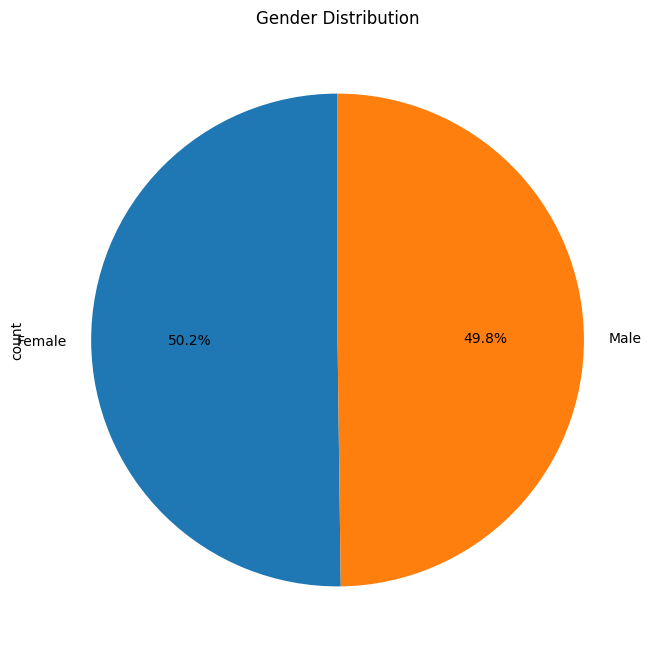

In [15]:
plt.figure(figsize=(8, 8))
train_data['Gender'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.show()

In [16]:
test_data.Gender.value_counts()

Gender
Female    6965
Male      6875
Name: count, dtype: int64

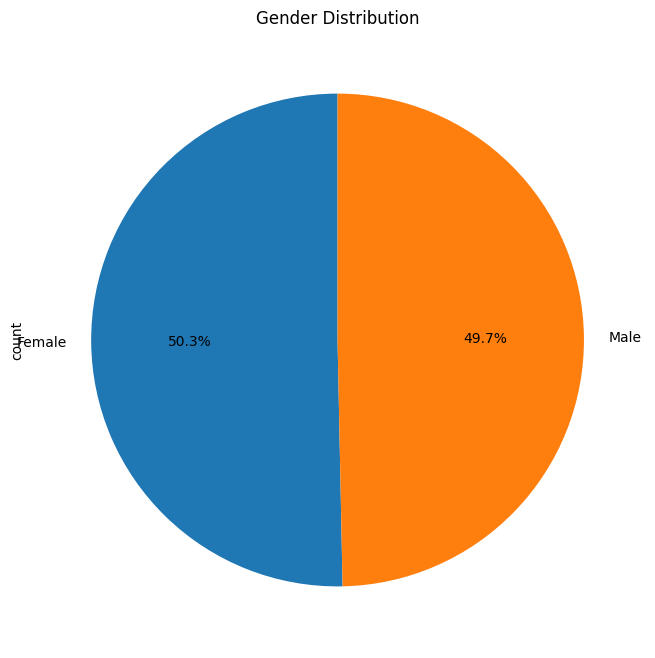

In [17]:
plt.figure(figsize=(8, 8))
test_data['Gender'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


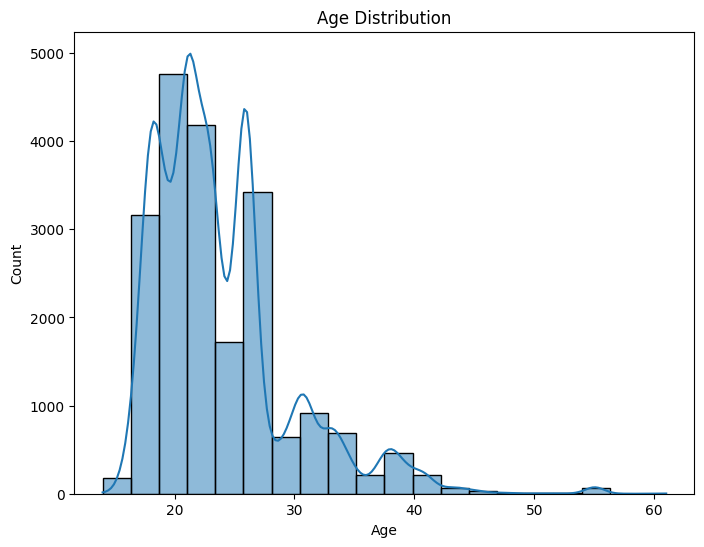

In [18]:
# Age Distribution (Histogram)
plt.figure(figsize=(8, 6))
sns.histplot(train_data['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

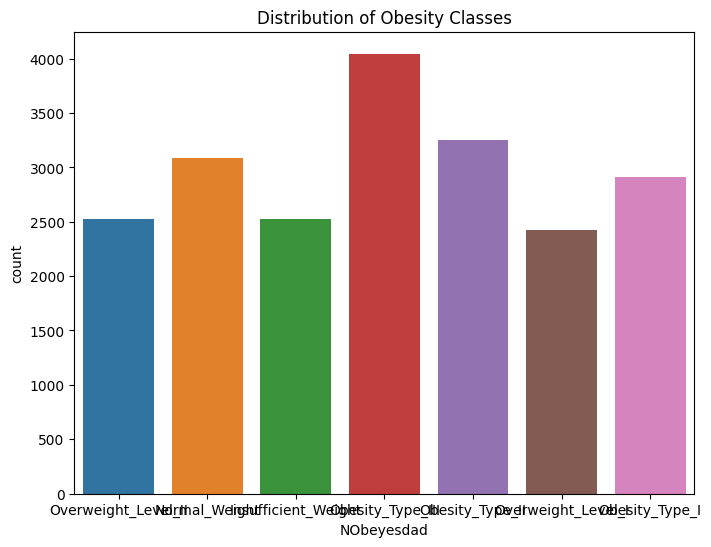

In [19]:
# Distribution of Obesity Class (Bar Plot)
plt.figure(figsize=(8, 6))
sns.countplot(x='NObeyesdad', data=train_data)
plt.title('Distribution of Obesity Classes')
plt.show()

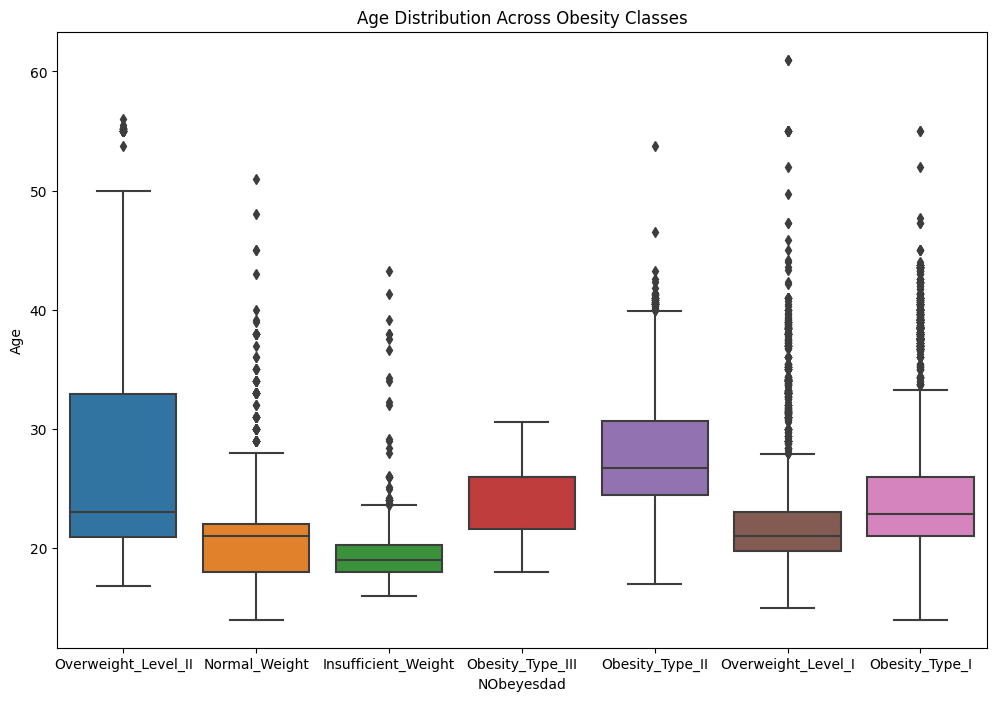

In [20]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='NObeyesdad', y='Age', data=train_data)
plt.title('Age Distribution Across Obesity Classes')
plt.show()

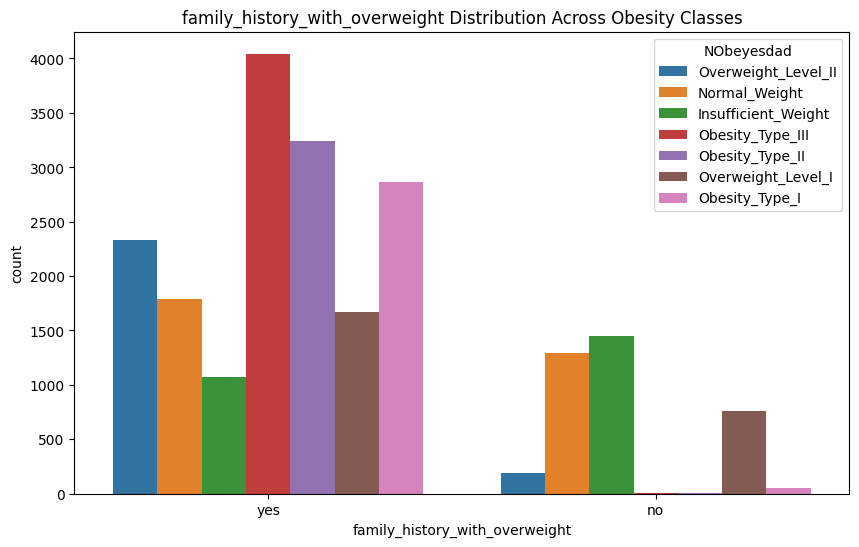

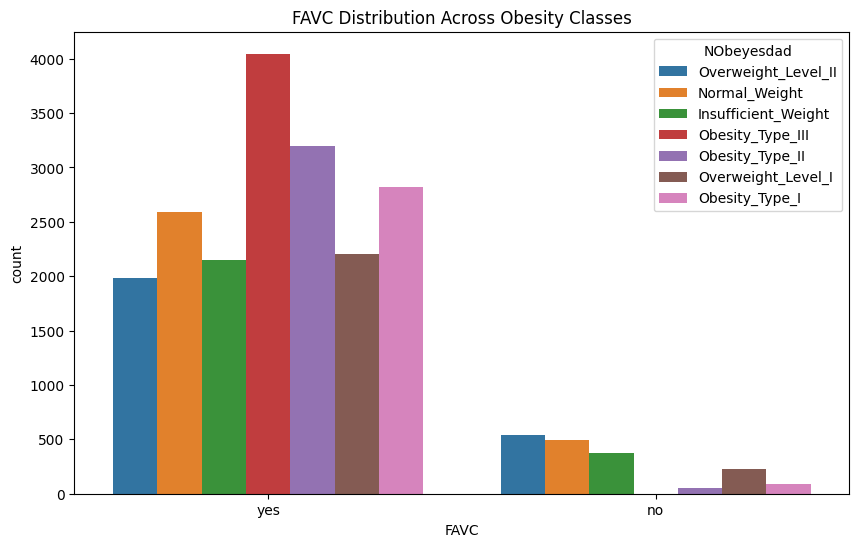

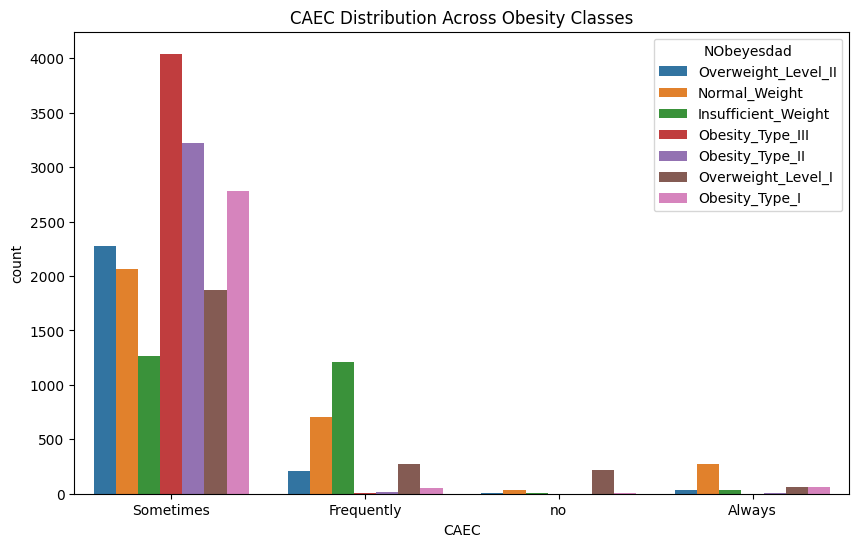

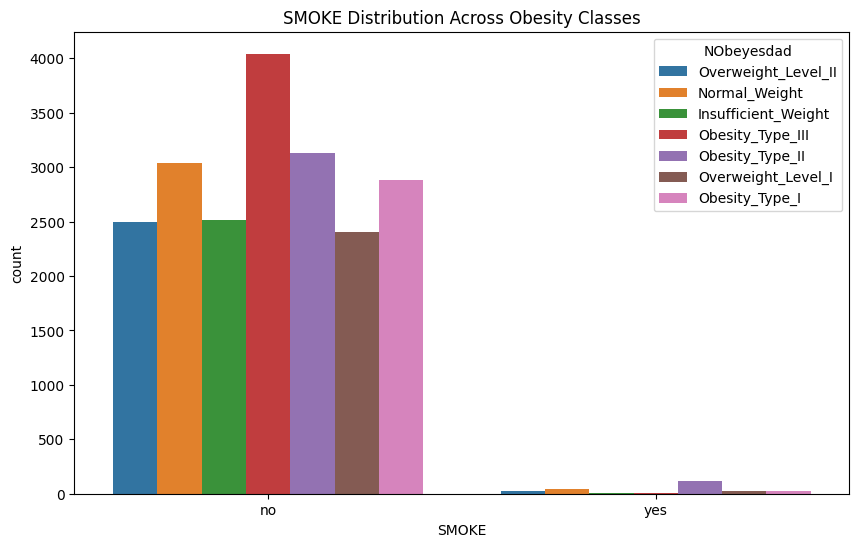

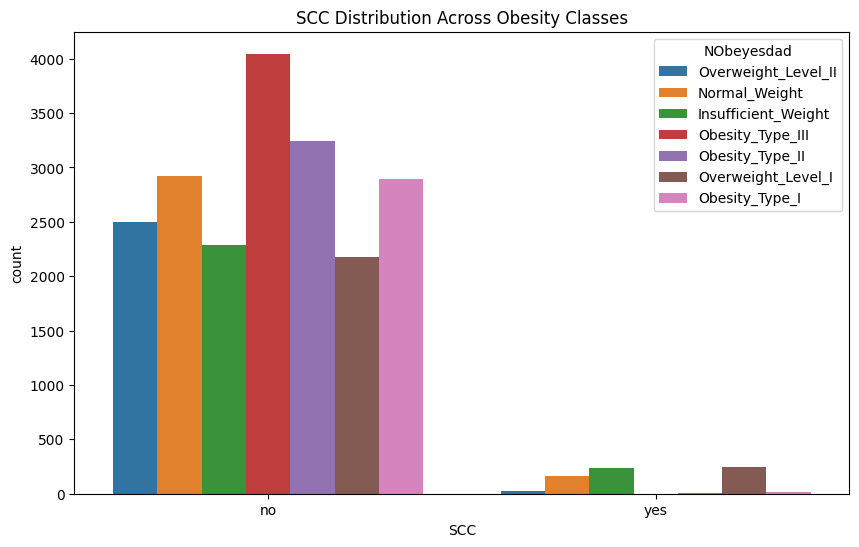

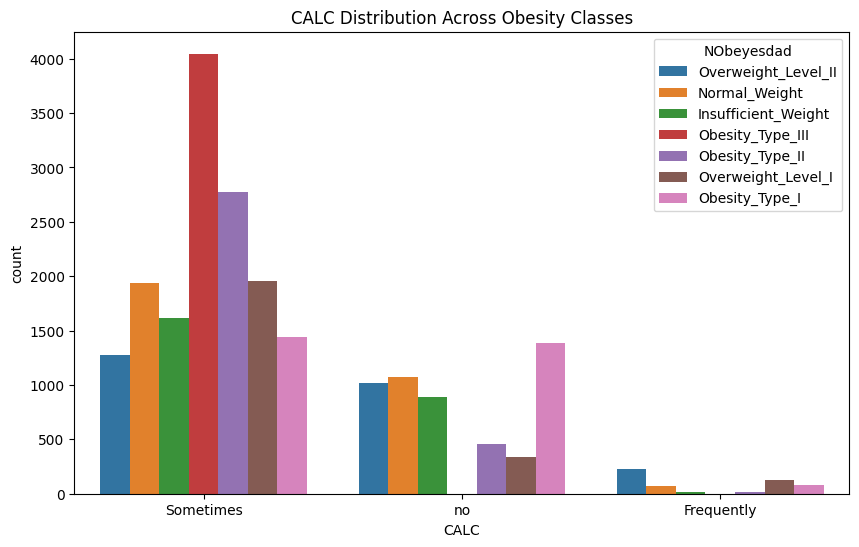

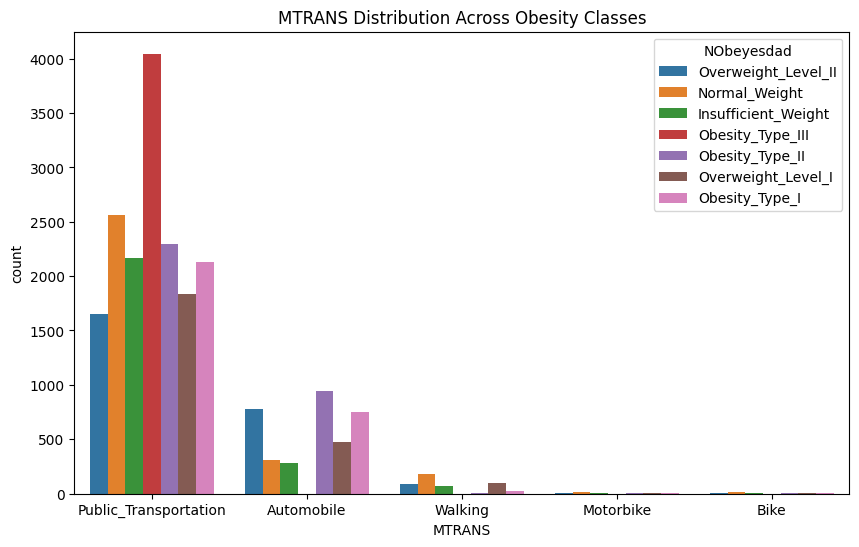

In [21]:
# Count Plots for Categorical Features
categorical_features = ['family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, hue='NObeyesdad', data=train_data)
    plt.title(f'{feature} Distribution Across Obesity Classes')
    plt.show()


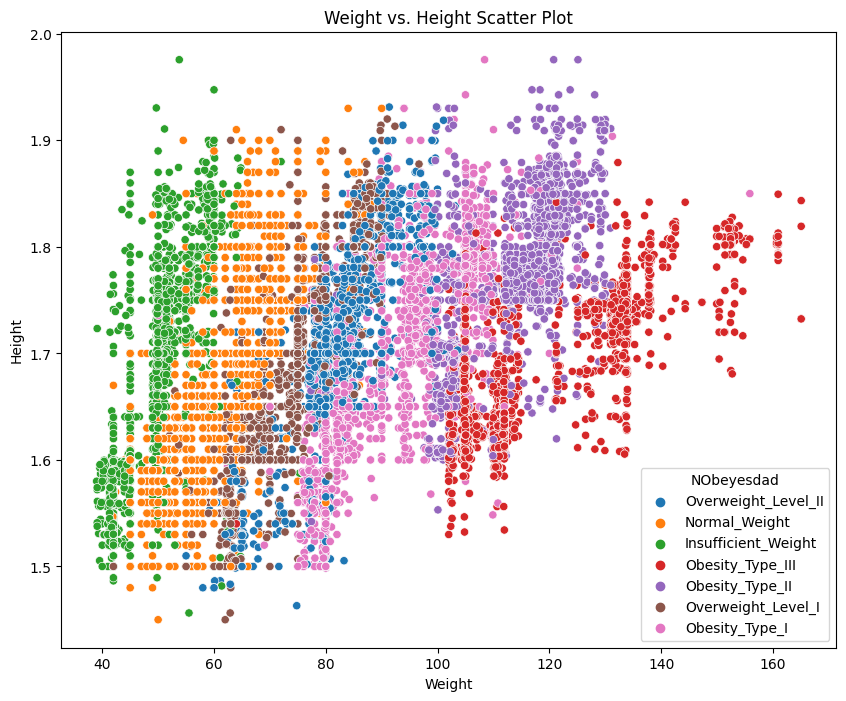

In [22]:
# Weight vs. Height Scatter Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Weight', y='Height', hue='NObeyesdad', data=train_data)
plt.title('Weight vs. Height Scatter Plot')
plt.show()

<Axes: xlabel='Age'>

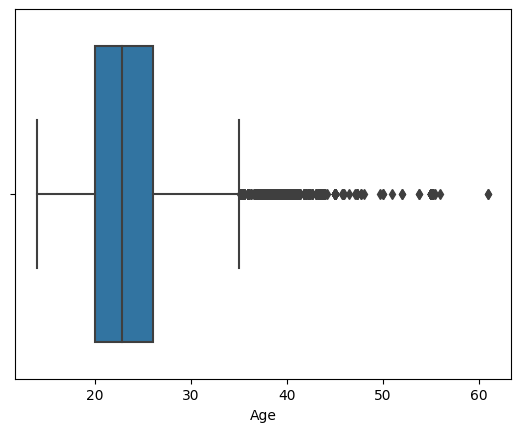

In [23]:
sns.boxplot(x='Age', data=train_data)

In [24]:
# Checking Outliers in Age Column and removing them by IQR (Inter Quartile Range)

# Calculate IQR
Q1 = train_data['Age'].quantile(0.25)
Q3 = train_data['Age'].quantile(0.75)
IQR = Q3 - Q1

# Identify Outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering out the outliers
train_data = train_data[(train_data['Age'] >= lower_bound) & (train_data['Age'] <= upper_bound)]


<Axes: xlabel='Age'>

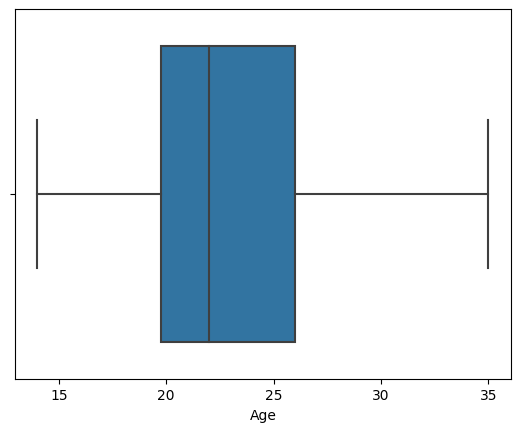

In [25]:
# Plot boxplot after handling outliers
sns.boxplot(x='Age', data=train_data)
# train_data.head()

In [26]:
def get_variable_types(dataframe):
    continuous_vars = []
    categorical_vars = []

    for column in dataframe.columns:
        if dataframe[column].dtype == 'object':
            categorical_vars.append(column)
        else:
            continuous_vars.append(column)

    return continuous_vars, categorical_vars

continuous_vars, categorical_vars = get_variable_types(train_data)
continuous_vars.remove('id'), categorical_vars.remove('NObeyesdad')

print("Continuous Variables:", continuous_vars)
print("Categorical Variables:", categorical_vars)

Continuous Variables: ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
Categorical Variables: ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']


In [27]:
train = train_data.drop(['id'], axis=1)
test = test_data.drop(['id'], axis=1)
train

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II


In [28]:
# # performing one-hot encoding on all the categorical attributes
# train = pd.get_dummies(train, columns = categorical_vars)
# test = pd.get_dummies(test, columns = categorical_vars)

# train.head()

In [29]:
X = train.drop(['NObeyesdad'], axis=1) # excluding target class
Y = train['NObeyesdad'] # Target class
X

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation
20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation
20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation
20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile


In [30]:
Y

0        Overweight_Level_II
1              Normal_Weight
2        Insufficient_Weight
3           Obesity_Type_III
4        Overweight_Level_II
                ...         
20753        Obesity_Type_II
20754    Insufficient_Weight
20755        Obesity_Type_II
20756    Overweight_Level_II
20757        Obesity_Type_II
Name: NObeyesdad, Length: 19684, dtype: object

# **Train-Test Split**

In [31]:
# Splitting data on training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [32]:
print(X.shape, X_train.shape, X_test.shape)

(19684, 16) (15747, 16) (3937, 16)


In [33]:
print(Y.shape, Y_train.shape, Y_test.shape)

(19684,) (15747,) (3937,)


# **Cat Boost Classifier**

In [34]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [35]:
# Define the CatBoost classifier
catboost = CatBoostClassifier()

# Define the hyperparameter grid
param_dist = {
    'iterations': randint(50, 500),
    'depth': randint(3, 10),
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'l2_leaf_reg': [1, 3, 5, 7, 9],
    'border_count': [32, 64, 128],
    'cat_features': [categorical_vars],  # Make sure to replace with your actual categorical columns
    'verbose': [0],
}

In [36]:
# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(catboost, param_distributions=param_dist, n_iter=5, scoring='accuracy', cv=5, verbose=1, n_jobs=-1, random_state=42)

# Fit the RandomizedSearchCV on the training data
random_search.fit(X_train, Y_train)

# Print the best hyperparameters
print("Best Hyperparameters:")
print(random_search.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Hyperparameters:
{'border_count': 128, 'cat_features': ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS'], 'depth': 7, 'iterations': 149, 'l2_leaf_reg': 5, 'learning_rate': 0.3, 'verbose': 0}


In [37]:
# Get the best model
best_catboost_model = random_search.best_estimator_


In [38]:
# Train the best model on the full training set
best_catboost_model.fit(X_train, Y_train)

In [39]:
# Evaluate the best model on the test set
accuracy = best_catboost_model.score(X_test, Y_test)
print(f"Accuracy on Test Set: {accuracy}")

Accuracy on Test Set: 0.905765811531623


In [40]:
# Make predictions on the X_test set
predictions = best_catboost_model.predict(X_test)

In [41]:
# Evaluate the model
accuracy = accuracy_score(Y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.905765811531623


In [42]:
# Confusion Matrix
cm = confusion_matrix(Y_test, predictions)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[452  28   0   1   0   1   0]
 [ 42 517   1   0   0  39   4]
 [  0   1 412  20   1   8  36]
 [  0   0  11 615   0   0   0]
 [  0   0   1   0 834   1   0]
 [  1  29   6   0   0 369  43]
 [  0  12  30   2   0  53 367]]


In [43]:
precision = precision_score(Y_test, predictions, average='weighted')
recall = recall_score(Y_test, predictions, average='weighted')
f1 = f1_score(Y_test, predictions, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Precision: 0.9058278939438462
Recall: 0.905765811531623
F1-Score: 0.9056242902500188


In [44]:
class_report = classification_report(Y_test, predictions)
print("Classification Report:")
print(class_report)

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.91      0.94      0.93       482
      Normal_Weight       0.88      0.86      0.87       603
     Obesity_Type_I       0.89      0.86      0.88       478
    Obesity_Type_II       0.96      0.98      0.97       626
   Obesity_Type_III       1.00      1.00      1.00       836
 Overweight_Level_I       0.78      0.82      0.80       448
Overweight_Level_II       0.82      0.79      0.80       464

           accuracy                           0.91      3937
          macro avg       0.89      0.89      0.89      3937
       weighted avg       0.91      0.91      0.91      3937



In [45]:
# On test data
# Make predictions on the test data
test_predictions = best_catboost_model.predict(test)

In [46]:
test_predictions.shape

(13840, 1)

# **Output File**

In [47]:
test_predictions = test_predictions.flatten()

In [48]:
print("Length of 'id' array:", len(test.index))
print("Length of 'NObeyesdad' array:", len(test_predictions))


Length of 'id' array: 13840
Length of 'NObeyesdad' array: 13840


In [49]:
# Create a DataFrame
submission = pd.DataFrame({"id": test_data["id"], "NObeyesdad": test_predictions})
submission.to_csv('submission.csv', index=False)